In [57]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.metrics import log_loss, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
sns.color_palette?

In [39]:
class SGDRegressor(BaseEstimator):
    def __init__(self, eta = 0.001, n_epochs = 3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []
    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0],1]) , X])
        
        w = np.zeros(X.shape[1])
        
        for it in tqdm(range(self.n_epochs)):
            for i in range(X.shape[0]):
                
                new_w = w.copy()
                new_w[0] += self.eta * (y[i] - w.dot(X[i, :]))
                for j in range(1, X.shape[1]):
                    new_w[j] += self.eta * (y[i] - w.dot(X[i, :])) * X[i,j]
                w = new_w.copy()
                
                self.weights_.append(w)
                self.mse_.append( mean_squared_error(y, X.dot(w)))
        self.w_ = self.weights_[np.argmin(self.mse_)]
        
        return self
    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        return X.dot(self.w_)

In [33]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [34]:
data_demo = pd.read_csv(DATA_PATH + "weights_heights.csv")

In [35]:
X, y = data_demo["Weight"].values, data_demo["Height"].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_test_scaled = scaler.transform(X_test.reshape([-1, 1]))

In [40]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_scaled, y_train)

100%|██████████| 3/3 [00:22<00:00,  7.66s/it]


SGDRegressor()

<Axes: >

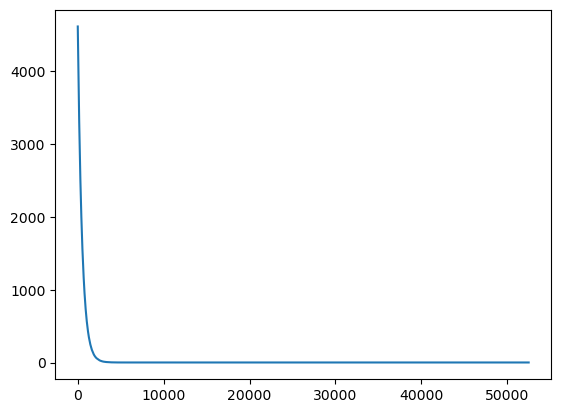

In [47]:
sns.lineplot(y = sgd_reg.mse_, x = range(52500))

In [53]:
np.min(sgd_reg.mse_), sgd_reg.w_

(2.7151352406643623, array([67.9898497 ,  0.94447605]))

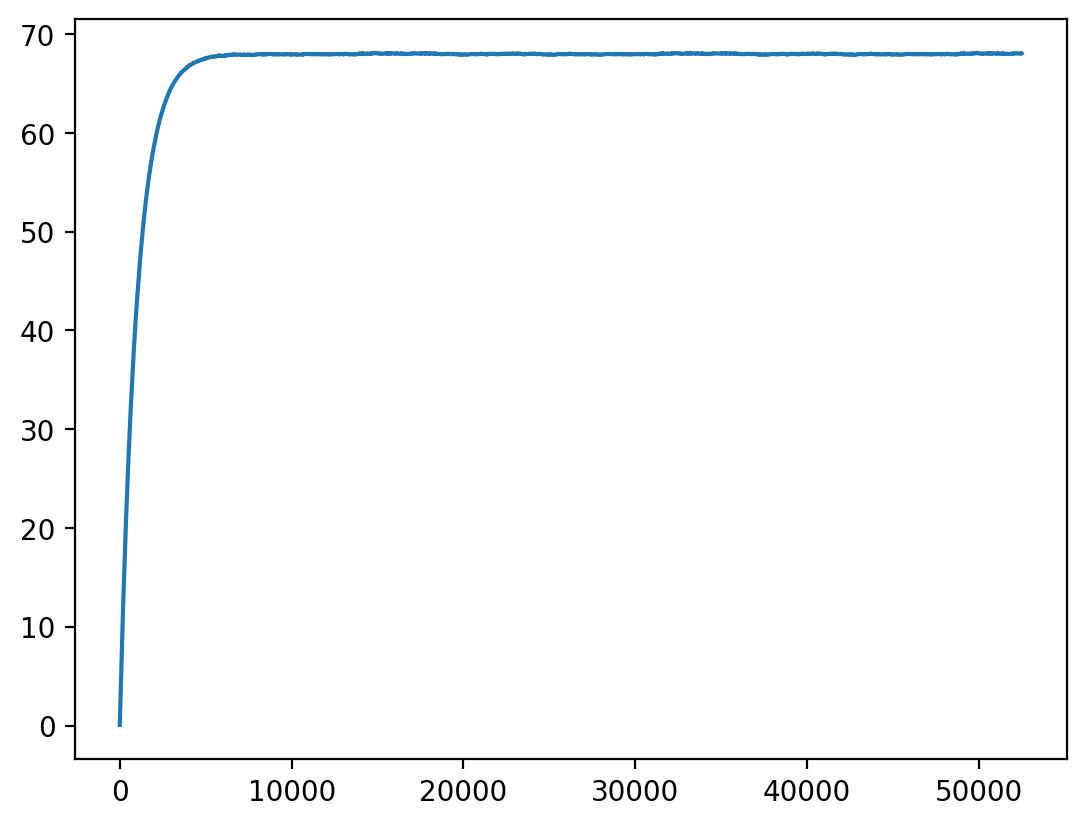

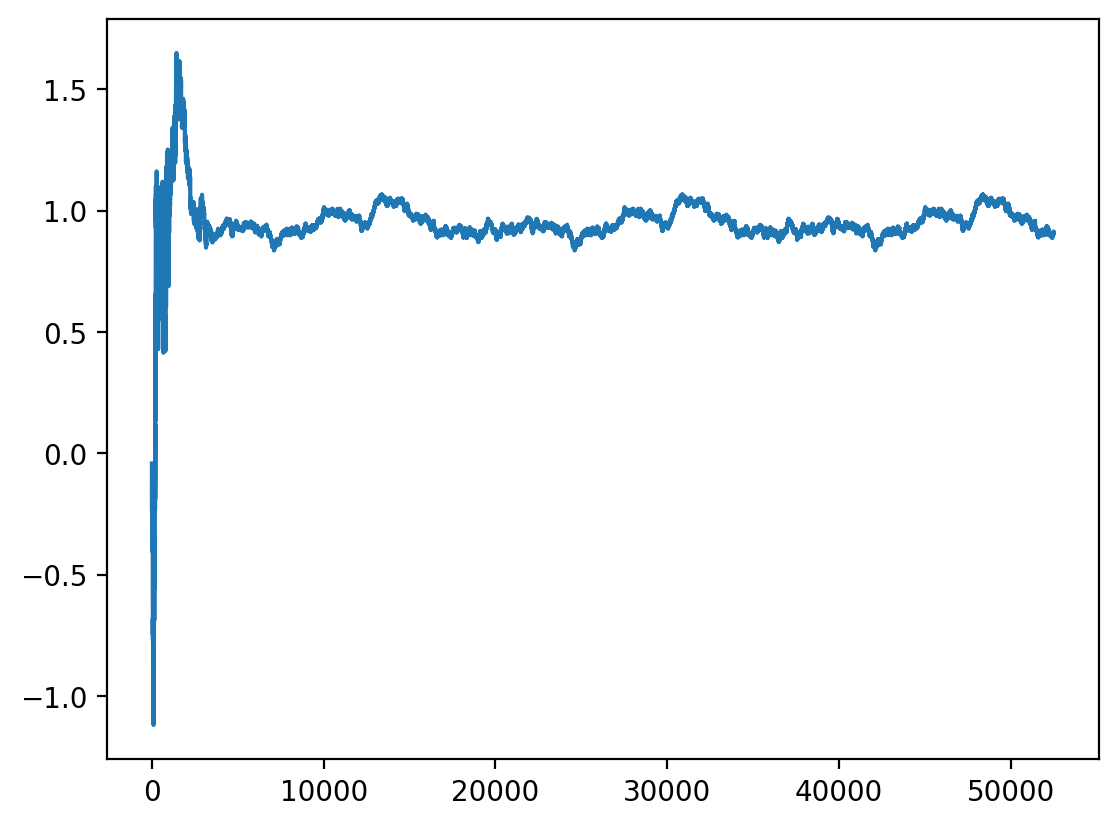

In [60]:

plt.plot(range(len(sgd_reg.weights_)),  [w[0] for w in sgd_reg.weights_])
plt.show()
plt.plot(range(len(sgd_reg.weights_)),  [w[1] for w in sgd_reg.weights_])
plt.show()

In [61]:
sgd_mean = mean_squared_error(y_valid, sgd_reg.predict(X_valid_scaled))
sgd_mean

2.6708681207033784

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_scaled, y_train)
mean_squared_error(y_valid, lr.predict(X_valid_scaled))

2.670830767667635